In [3]:
print("Hello bye");
row=list();
ft=open("train.csv");
data=ft.read();
print(data);

Hello bye
ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.9557700000000001,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,5.66637,0.0,18.1,0,0.74,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,0.045439999999999994,0.0,3.24,0,0.46,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
5,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57,20.6
6,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.413,24,666.0,20.2,2.6,10.11,15.0
7,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.9,26.82,13.4
8,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
9,0.24522,0.0,9.9,0,0.544,5.782,71.7,4.0317,4,304.0,18.4,396.9,15.94,19.8
10,0.57834,20.0,3.97,0,0.575,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0
11,0.03537,34.0,6.09,0,0.433,6.59,40.4,5.4917,7,329.0,16.1,395.75,

In [4]:
import numpy as np;
from numpy.linalg import inv;
from numpy.linalg import det;
import matplotlib.pyplot as plt;
import math;

trainDSSizePercentage=0.6; # x*100 percentage. 1-x data set will be used for validating

# Will read the file and convert it into two dataset one train data other validate data
def readTrainData(fileName):
    row_index=0;
    phi=list();
    y=list();
    with open(fileName) as f:
        for line in f:
            if row_index >0:
                phi_i=list((float(n) for n in line.split('\n')[0].split(",") ));
                phi_i[0]=1;            
                # last row is value of yi
                y_i=phi_i.pop(len(phi_i)-1);                                                
                phi.append(phi_i);             
                y.append(y_i);
            row_index+=1;
    return [phi,y];
#End-readTrainData

#split train data into Train and Validate
def spitTrainDataset(phi,y):
    m=len(phi);        
    tdsSize=int(m*trainDSSizePercentage);
    trainDatasetPhi=phi[0:tdsSize];
    trainDatasetY=y[0:tdsSize];
    validateDatasetPhi=phi[tdsSize:m];
    validateDatasetY=y[tdsSize:m];    
    return [trainDatasetPhi,trainDatasetY,validateDatasetPhi,validateDatasetY];    
    pass

# Will read the file and convert it into dataset for Testing the Model
def readTestData(fileName):
    row_index=0;
    phi=list();
    y=list();
    with open(fileName) as f:
        for line in f:
            if row_index >0:
                phi_i=list((float(n) for n in line.split('\n')[0].split(",") ));
                phi_i[0]=1;
                phi.append(phi_i);                             
            row_index+=1;
    m=len(phi);    
    return phi;
#End-readTrainData

#write-output
def writeTestData(ystar):
    fo = open("output.csv", "w");    
    fo.write("ID,MEDV\n");
    m=len(ystar);
    for i in range(m):
        fo.write(str(i)+","+str(ystar[i])+"\n");
    fo.close();
    pass;

# Return det of matrix
def getDet(A):
    d=det(A);
    if(d<10**-10):
        return 0;
    return d;


# Finding w*=(QTQ)^-1QTY
def trainUsingClosedFormEquation(dataset,output):
    m=len(dataset);
    n=len(dataset[0]);
    print("------------------");
    #print(dataset);
    phi=np.array(dataset);
    print("------------------");
    #print(phi);    
    y=np.array(output);
    phiT=np.transpose(phi);
    #(QTQ)    
    phiT_phi=np.dot(phiT,phi);   
    d=getDet(phiT_phi)
    if(d>0):
        #(QTQ)^-1
        phiT_phi_inv=inv(phiT_phi);
        #(QTQ)^-1QT
        phiT_phi_inv_phiT=np.dot(phiT_phi_inv,phiT);  
        #(QTQ)^-1QT*Y
        w=np.dot(phiT_phi_inv_phiT,y);
        return w;
    else:
        print("Error:Phi is NOT full column rank.");
        return None;
    pass;

#pridict of y* given w* QW=y*
def pridict(dataset,weight):
    phi=np.array(dataset);
    w=np.array(weight);
    ystar=np.dot(phi,w);
    return ystar;
    pass;

#Return RMS: root mean square error
def getRMS(y,yStar):
    m=len(y);
    sigma=0;
    for i in range(m):
        delta=(y[i]-yStar[i]);
        delta=delta*delta;
        sigma=sigma+delta;
    meanSq=sigma/m;   
    rms=math.sqrt(meanSq);
    return rms;
    pass;

#normalize the data set ny (x-u)/s where s is max-min
def normalizePhi(unNormalizedPhi):    
    phi=np.array(unNormalizedPhi);
    print("Normalizing Phi...");  
    std=phi.std(0);
    mean=phi.mean(0);    
    std[0]=1;
    mean[0]=0;
    phi_normalize=(phi-mean)/std;    
    print("Normalization done.");
    return phi_normalize;
    pass;

def numpiTestFun():
    A2= np.matrix([[4,6],[2,-8]])        
    A3= np.matrix([[1,2,3],[4,5,7],[7,8,9]])
    A=A2;
    print(A);
    print("Det(A):"+str(getDet(A)));
    B= np.transpose(A);
    C=inv(A);
    #print(C);
    print(np.dot(A,C));
    print(A.std(0));
    print(A.mean(0));
    print(normalizePhi(A));
    norm=(A-A.mean(0))/A.std(0);    
    print(norm);    
    print();
    pass;

def plotGraph(x,y):
    plt.plot(x,y)
    plt.ylabel('rms')
    plt.xlabel('iteration');
    plt.show();
    pass;

In [68]:
# GD: Least Sq. Without Regularlization
def gardientDescentErrorFun(phi,y):
    m=len(y);#no of data points
    n=len(phi[0]);# no. of features    
    alpha=0.12;# learning parameter
    maxIteration=1000000;
    phi=np.array(phi);
    y=(np.array(y));#converting row vector to col vector    
    wk0=np.zeros(n);# Nx1 vector
    phiT=np.transpose(phi);
    phiTphi=np.dot(phiT,phi);   
    phiTy=np.dot(phiT,y);   
    alphaBym=alpha/m;
    lam=0.945;
    xaxis=list();
    yaxis=list();
    #----------------------
    print("Training Started (Least Sq. Without Regularlization) ...");
    for i in range(maxIteration):  
        wk1=wk0-(alphaBym*((np.dot(phiTphi,wk0)-phiTy)+(lam*wk0)));                
        ystar=pridict(phi,wk1);
        rms=getRMS(y,ystar);    
        xaxis.append(i);
        yaxis.append(rms);
        percentComplete=((i+1)*100)/maxIteration;
        if( percentComplete%10==0 ):
            print("Percent Completed",percentComplete);
        wk0=wk1;
    print("Final Trained RMS:",rms);
    plotGraph(xaxis,yaxis);
    return wk1;
    pass;
wStart=gardientDescentErrorFun(trainDatasetPhi,trainDatasetY);

Training Started (Least Sq. Without Regularlization) ...


KeyboardInterrupt: 

In [39]:
def mainClosedFormSolWithoutReg():

    #--------------------[Closed Form Sol without Regularlization]--------------------------------
    #Find w*
    wStar=trainUsingClosedFormEquation(trainDatasetPhi,trainDatasetY);
    #Predict y* for Validate Data
    ystar=pridict(validateDatasetPhi,wStar);
    #checking for RMS for Validate Data
    rms=getRMS(validateDatasetY,ystar);
    #Predict y* for TestData
    ystar=pridict(testDS,wStar);
    writeTestData(ystar);
    print("ClosedFormSolWithoutReg RMS:",rms);
    #---------------------------------------------------------------------------------------------
    pass;

Fetching Trained Dataset from file...
Normalizing Phi...
Normalization done.
Fetching of data Completed.
Normalizing Phi...
Normalization done.
Train Size:240
Validate Size:160
Training Started (Least Sq. Without Regularlization) ...
Percent Completed 10.0
Percent Completed 20.0
Percent Completed 30.0
Percent Completed 40.0
Percent Completed 50.0
Percent Completed 60.0
Percent Completed 70.0
Percent Completed 80.0
Percent Completed 90.0
Percent Completed 100.0
Final Trained RMS: 4.462877362073255


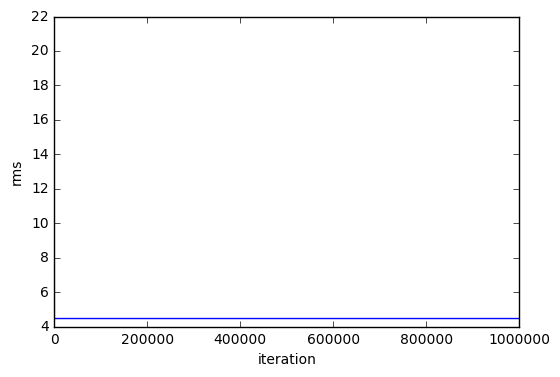

ClosedFormSolWithoutReg RMS: 4.925527684760871


In [69]:
#--settings--
np.set_printoptions(suppress=True)
#---init---
dir=""
trainFile=dir+"train.csv";
testFile=dir+"test.csv";
print("Fetching Trained Dataset from file...");
dataset=readTrainData(trainFile);
phiSet=dataset[0];
ySet=dataset[1];
phiSet_norm=normalizePhi(phiSet);
dataset=spitTrainDataset(phiSet_norm,ySet);
print("Fetching of data Completed.");

#train set
trainDatasetPhi=dataset[0];
trainDatasetY=dataset[1];
#validate set
validateDatasetPhi=dataset[2];
validateDatasetY=dataset[3];
#test set
testDS=readTestData(testFile);
testDS_norm=normalizePhi(testDS);
#print(testDS);
#print(testDS_norm);
print("Train Size:"+str(len(trainDatasetPhi)));
print("Validate Size:"+str(len(validateDatasetPhi)));
#numpiTestFun();

#mainClosedFormSolWithoutReg();
#--------------------[Gradient decent without Regularlization]--------------------------------
wStar=gardientDescentErrorFun(trainDatasetPhi,trainDatasetY);
#Predict y* for Validate Data
ystar=pridict(validateDatasetPhi,wStar);
#checking for RMS for Validate Data
rms=getRMS(validateDatasetY,ystar);
#Predict y* for TestData
ystar=pridict(testDS_norm,wStar);
writeTestData(ystar);
print("ClosedFormSolWithoutReg RMS:",rms);
#---------------------------------------------------------------------------------------------
